In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Manaus.csv', sep=';', low_memory=False)

In [5]:
df_cases_confirmed = df[df['_classificacao'].isin(['Confirmado'])]

In [6]:
print("Total de ",df.shape[1]," atributos que descrevem cada exemplo, sendo eles:")
df_columns = df.columns.to_numpy()
for i in df_columns:
    print(i)

Total de  36  atributos que descrevem cada exemplo, sendo eles:
_idade
_faixa etária
_sexo
_bairro
_classificacao
_comorb_renal
_comorb_diabetes
_comorb_imuno
_comorb_cardio
_conclusao
_dt_notificacao
_taxa
_dt_evolucao
_raca
_dt_sintomas
_criterio
_tipo_teste
_sintoma_garganta
_sintoma_dispneia
_sintoma_febre
_sintoma_tosse
_sintoma_outros
_etnia
_profiss_saude
_srag
_se_notificacao
_distrito
_bairro_mapa
_comorb_respiratoria
_comorb_cromossomica
_comorb_hepatica
_comorb_neurologica
_comorb_hemato
_comorb_obessidade
_origem
_evolução


In [7]:
print("Total de {} casos confirmados em Manaus.".format(df_cases_confirmed.shape[0]))

Total de 36671 casos confirmados em Manaus.


In [8]:
df_dates = df_cases_confirmed['_dt_notificacao'].drop_duplicates().dropna().to_numpy()
array_dates = np.sort(df_dates)
print("O registro mais antigo eh de '{}' e o mais recente de '{}'.".format(array_dates[0],array_dates[-1]))


O registro mais antigo eh de '01/04/2020' e o mais recente de '31/07/2020'.


In [9]:
df_cases_confirmed = df_cases_confirmed.drop(['_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio', '_comorb_respiratoria', '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica', '_comorb_hemato', '_comorb_obessidade', '_sintoma_garganta', '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse', '_sintoma_outros', '_etnia', '_profiss_saude', '_dt_evolucao', '_dt_sintomas', '_raca', '_srag', '_origem', '_evolução', '_criterio'], axis=1).dropna()

In [10]:
print("Total de Atributos: ", df_cases_confirmed.shape[1])
print("Total de Exemplos: ", df_cases_confirmed.shape[0])


Total de Atributos:  12
Total de Exemplos:  6145


In [11]:
amount_recovered = int(df[df['_conclusao'].isin(['Recuperado'])].shape[0])
amount_total = int(df.shape[0])

print("Total de casos: {}\nTotal recuperado: {} = %{:.0f}".format(amount_total, amount_recovered, ((amount_recovered*100)/amount_total)))

Total de casos: 107221
Total recuperado: 60671 = %57


In [12]:
amount_male = int(df[df['_sexo'].isin(['M'])].shape[0])
amount_female = int(df[df['_sexo'].isin(['F'])].shape[0])

if (amount_male > amount_female):
    print("Masculino, com {} casos.".format(amount_male))
else:
    print("Feminino, com {} casos.".format(amount_female))

Feminino, com 59021 casos.


In [13]:
df['_idade'] = df['_idade'].to_frame().query('_idade < 120')['_idade']

df_average_age = df['_idade'].mean()
df_standard_deviation = df['_idade'].std() 

df_the_oldest = df['_idade'].max()
df_the_youngest = df['_idade'].min()

print('Média de idade: {}\nDesvio Padrão: {}\nO mais jovem tem {} anos e o mais idoso tem {} anos'.format(df_average_age,df_standard_deviation,df_the_youngest,df_the_oldest))

Média de idade: 41.02112163146395
Desvio Padrão: 16.8004335024861
O mais jovem tem 0.0 anos e o mais idoso tem 118.0 anos


In [14]:
neighborhood_highest_incidence = df.groupby(by ='_bairro').size().idxmax()
number_of_cases = df.groupby(by ='_bairro').size().max()

print ('O bairro com maior incidência de casos foi {} com {} casos.'.format(neighborhood_highest_incidence,number_of_cases))

O bairro com maior incidência de casos foi CIDADE NOVA com 5920 casos.


In [15]:
neighborhoods_highest_recovered_incidence = df[df['_conclusao'].isin(['Recuperado'])].groupby(by ='_bairro').size().sort_values(ascending=False).head(3)

print ('Os três bairros com maior incidência de casos recuperados foram {} com {}, {} com {} e {} com {} casos recuperados.'.format(neighborhoods_highest_recovered_incidence.index[0],neighborhoods_highest_recovered_incidence[0], neighborhoods_highest_recovered_incidence.index[1], neighborhoods_highest_recovered_incidence[1], neighborhoods_highest_recovered_incidence.index[2], neighborhoods_highest_recovered_incidence[2]))

Os três bairros com maior incidência de casos recuperados foram CIDADE NOVA com 3115, FLORES com 2420 e JORGE TEIXEIRA com 1730 casos recuperados.


In [16]:
casos_recuperados = df[df['_conclusao'].isin(['Recuperado'])].groupby(by ='_bairro').size()
casos_recuperados

_bairro
105                                1
114                                1
298                                1
A MENDES                           1
A NASCIMENTO                       1
A. NASCIMENTO                      1
ABRAAO DE ARAUJO                   1
ACACU                              1
ADIANOPOLIS                        5
ADIRANOPOLIS                       1
ADRANÓPOLIS                        2
ADRIAMOPOLIS                       1
ADRIANAPOLIS                       2
ADRIANIPOLIS                       1
ADRIANNOPOLIS                      1
ADRIANOOLIS                        1
ADRIANOPILIS                       2
ADRIANOPLIS                        1
ADRIANOPOIS                        1
ADRIANOPOLES                       4
ADRIANOPOLIOS                      1
ADRIANOPOLIS                    1176
ADRIANOPOLIS COND OURO PRETO       1
ADRIANOPOLIS,                      1
ADRIANOPPOLIS                      1
ADRIANOPÓLIS                       2
ADRIANPOLIS                   

In [17]:
bairros = df.groupby(by='_bairro').size().sort_values(ascending=False).head(10)
bairros

_bairro
CIDADE NOVA          5920
FLORES               4087
JORGE TEIXEIRA       3084
CENTRO               2887
PETROPOLIS           2860
NOVO ALEIXO          2853
ALEIXO               2656
SAO JOSE OPERARIO    2646
ALVORADA             2605
COROADO              2453
dtype: int64

TypeError: formatter argument should be instance of matplotlib.ticker.Formatter

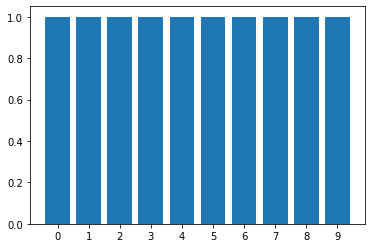

In [18]:
bairrosDict = ['CIDADE NOVA', 'FLORES', 'JORGE TEIXEIRA', 'CENTRO', 'PETROPOLIS',
    'NOVO ALEIXO', 'ALEIXO', 'SAO JOSE OPERARIO', 'ALVORADA', 'COROADO']

bairros = Counter(bairrosDict)

def plot(counter, ax=None):
    if(ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    frequencies = counter.values()
    names = counter.keys()
    
    x_coordinates = np.arange(len(counter))
    ax.bar(x_coordinates, frequencies, align='center')
    
    ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
    ax.xaxis.set_major_formatter(plt.FixedLocator(names))
    
    return ax

plot(bairros)
plt.show()

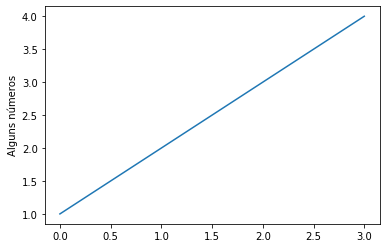

In [19]:
plt.plot([1, 2, 3, 4])
plt.ylabel('Alguns números')
plt.show()

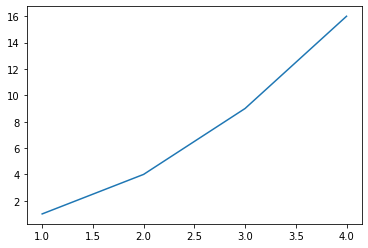

In [20]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

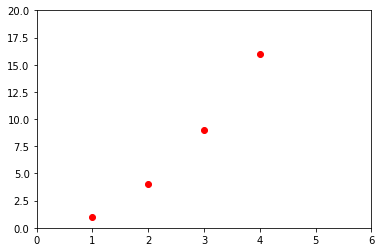

In [21]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

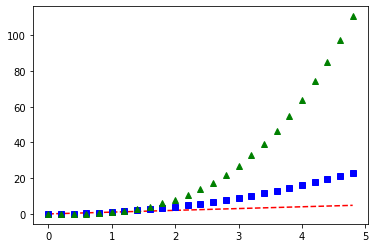

In [22]:
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

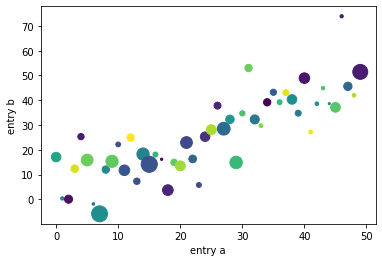

In [23]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

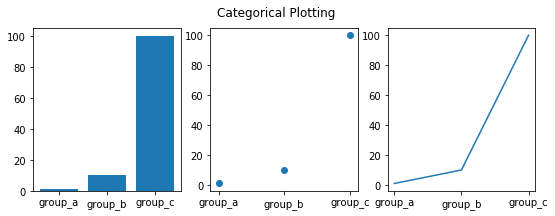

In [24]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [25]:
bairros = df.groupby(by='_bairro').size().sort_values(ascending=False).head(10)
bairros

_bairro
CIDADE NOVA          5920
FLORES               4087
JORGE TEIXEIRA       3084
CENTRO               2887
PETROPOLIS           2860
NOVO ALEIXO          2853
ALEIXO               2656
SAO JOSE OPERARIO    2646
ALVORADA             2605
COROADO              2453
dtype: int64

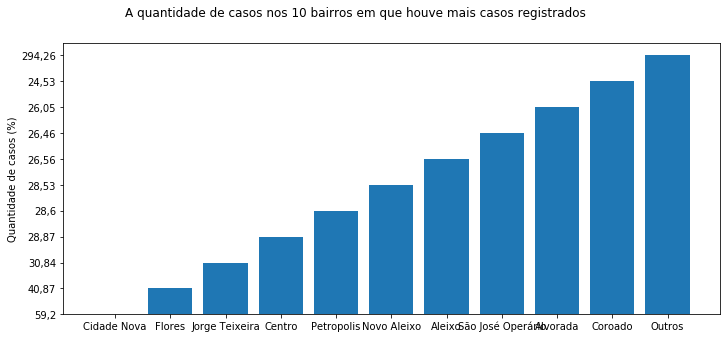

In [26]:
bairros = df[]
''''
bairros = ['Cidade Nova', 'Flores', 'Jorge Teixeira', 'Centro', 
           'Petropolis', 'Novo Aleixo', 'Aleixo', 'São José Operário',
           'Alvorada', 'Coroado', 'Outros']
casos = ['59,2', '40,87', '30,84', '28,87', '28,6', '28,53', '26,56', '26,46', '26,05',
          '24,53', '294,26']

plt.figure(figsize=(40,5))
plt.suptitle('A quantidade de casos nos 10 bairros em que houve mais casos registrados')
plt.subplot(132)
plt.ylabel('Quantidade de casos (%)')
plt.bar(bairros, casos)
plt.show()
'''

In [27]:
bairros = df.groupby(by='_bairro').size().sort_values(ascending=True)
bairros

_bairro
LIRO DO VALE2                    1
NOSSA SRA  GRACAS                1
NOSSA SRA D GRACA                1
NOSSA SRA DAS GRA AS             1
NOSSA SRA DAS GRACSS             1
NOSSA SRA DAS GRCAS              1
NOSSA SRA DO P. SOCOORO          1
NOSSA SRA FATIMA                 1
NOSSA SRA. APARECIDA             1
NOSSA SRA. DE FATIMA             1
NOSSA SRA. FATIMA II /           1
NOSSA SRAGRACAS                  1
NOSSA SR° DAS GRACAS             1
NOSSAS ENHORA DAS GRAÇAS         1
NOSSAS SENHORA DAS GRACAS        1
NOSSASENHORA DE FATIMA           1
NOV ALEIXO                       1
NOV VITORIA                      1
NOSSA SR FATIMA                  1
NOSSA SR DAS GRACAS              1
NOSSA SNHORA DAS GRACAS          1
NOSSA SENHROA DAS GRACAS         1
NOSSA SENHORA DAS GRASCAS        1
NOSSA SENHORA DE FATIMA 02       1
NOSSA SENHORA DE FATIMA1         1
NOSSA SENHORA DE FATIMAS         1
NOSSA SENHORA DE FATMA           1
NOSSA SENHORA DE FÁTIMA          1
NOSSA SENHOR

## 3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados

In [28]:
df_cases = pd.to_datetime(df['_dt_notificacao'], format="%d/%m/%Y")
array_dates = np.sort(df_cases.dropna().dt.strftime("%m/%d/%Y"))
unique_elements, counts_elements = np.unique(array_dates, return_counts=True)
result = np.asarray((unique_elements[::-1], counts_elements[::-1]))
last_ten_days_dates = result[0][:10][::-1]
last_ten_days_values = result[1][:10][::-1]

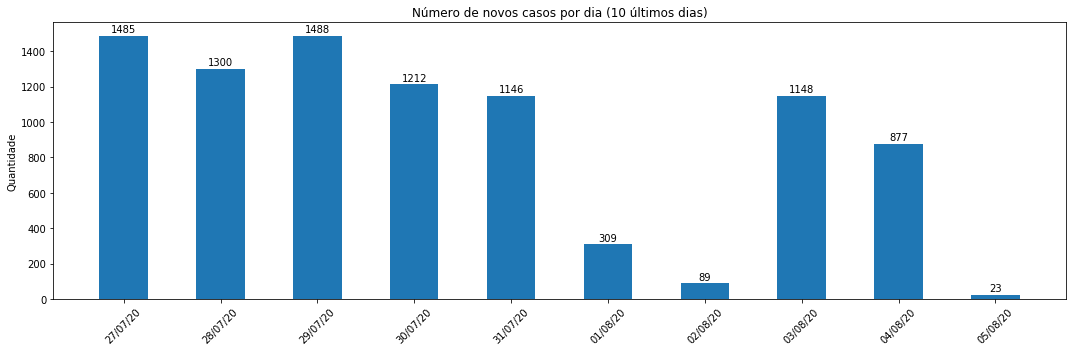

In [29]:
labels = pd.to_datetime(last_ten_days_dates).strftime("%d/%m/%y")
values = last_ten_days_values

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15, 5))
rects = ax.bar(x - width/2, values, width, align='edge')

ax.set_ylabel('Quantidade')
ax.set_title("Número de novos casos por dia (10 últimos dias)")
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(labels)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 1.5),
                   textcoords="offset points",
                   ha='center', va='bottom')
        
autolabel(rects)
fig.tight_layout()

plt.show()

## 4. Repita o gráfico anterior considerando o número de casos recuperado

In [33]:
df_cases_recovered = df['_conclusao'].isin(['Recuperado'])
df_cases_recovered
#df_cases_recovered = pd.to_datetime(df_cases_recovered, format="%d/%m%Y")
#array_dates = np.sort(df_cases_recovered.dropna().dt.strftime("%m/%d/%Y"))
#unique_elements, counts_elements = np.unique(array_dates, return_counts=True)
#result = np.asarray((unique_elements[::-1], counts_elements[::-1]))
#last_ten_days_dates = result[0][:10][::-1]
#last_ten_days_values = result[1][:10][::-1]

0                NaN
1                NaN
2                NaN
3         Recuperado
4         Recuperado
5                NaN
6                NaN
7         Recuperado
8                NaN
9                NaN
10               NaN
11        Recuperado
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28        Recuperado
29               NaN
             ...    
107191           NaN
107192    Recuperado
107193    Recuperado
107194    Recuperado
107195    Recuperado
107196    Recuperado
107197    Recuperado
107198    Recuperado
107199    Recuperado
107200    Recuperado
107201    Recuperado
107202    Recuperado
107203    Recuperado
107204    Recuperado
107205    Recuperado
107206    Recuperado
107207    Rec